In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import datetime

In [2]:
trump_data = "approval_ratings/trump_ratings.csv"
trump_ratings = pd.read_csv(trump_data)
trump_ratings['enddate'] = pd.to_datetime(trump_ratings['enddate'])
trump_ratings

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,7/17/2020,1/20/2017,2017-01-22,Morning Consult,B/C,1992.0,rv,0.680029,...,37.0,45.136218,37.901041,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,7/17/2020 9:53
1,Donald Trump,All polls,7/17/2020,1/20/2017,2017-01-22,Gallup,B,1500.0,a,0.262323,...,45.0,45.761409,43.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,7/17/2020 9:53
2,Donald Trump,All polls,7/17/2020,1/20/2017,2017-01-24,Ipsos,B-,1632.0,a,0.153481,...,45.2,43.122312,43.865379,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,7/17/2020 9:53
3,Donald Trump,All polls,7/17/2020,1/21/2017,2017-01-23,Gallup,B,1500.0,a,0.242845,...,46.0,45.761409,44.566085,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,7/17/2020 9:53
4,Donald Trump,All polls,7/17/2020,1/20/2017,2017-01-25,Quinnipiac University,B+,1190.0,rv,1.514172,...,44.0,37.646971,42.745973,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,49260,77272,1/26/2017,7/17/2020 9:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12716,Donald Trump,Voters,7/17/2020,7/13/2020,2020-07-15,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.152528,...,51.0,42.821395,51.675504,NaN,T,http://www.rasmussenreports.com/public_content...,67112,125416,7/16/2020,7/17/2020 9:55
12717,Donald Trump,Voters,7/17/2020,7/13/2020,2020-07-14,Ipsos,B-,961.0,rv,0.786636,...,56.0,40.333788,53.959217,NaN,NaN,https://www.ipsos.com/sites/default/files/ct/n...,67109,125412,7/15/2020,7/17/2020 9:55
12718,Donald Trump,Voters,7/17/2020,7/13/2020,2020-07-15,YouGov,B,783.0,rv,0.192359,...,57.0,39.249205,56.425250,NaN,NaN,https://docs.cdn.yougov.com/hi43cpnou0/tabs_Tr...,67105,125399,7/15/2020,7/17/2020 9:55
12719,Donald Trump,Voters,7/17/2020,7/14/2020,2020-07-16,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.482497,...,53.0,40.821395,53.675504,NaN,T,http://www.rasmussenreports.com/public_content...,67118,125424,7/17/2020,7/17/2020 9:55


In [3]:
trump_ratings['enddate'] = pd.to_datetime(trump_ratings['enddate'])

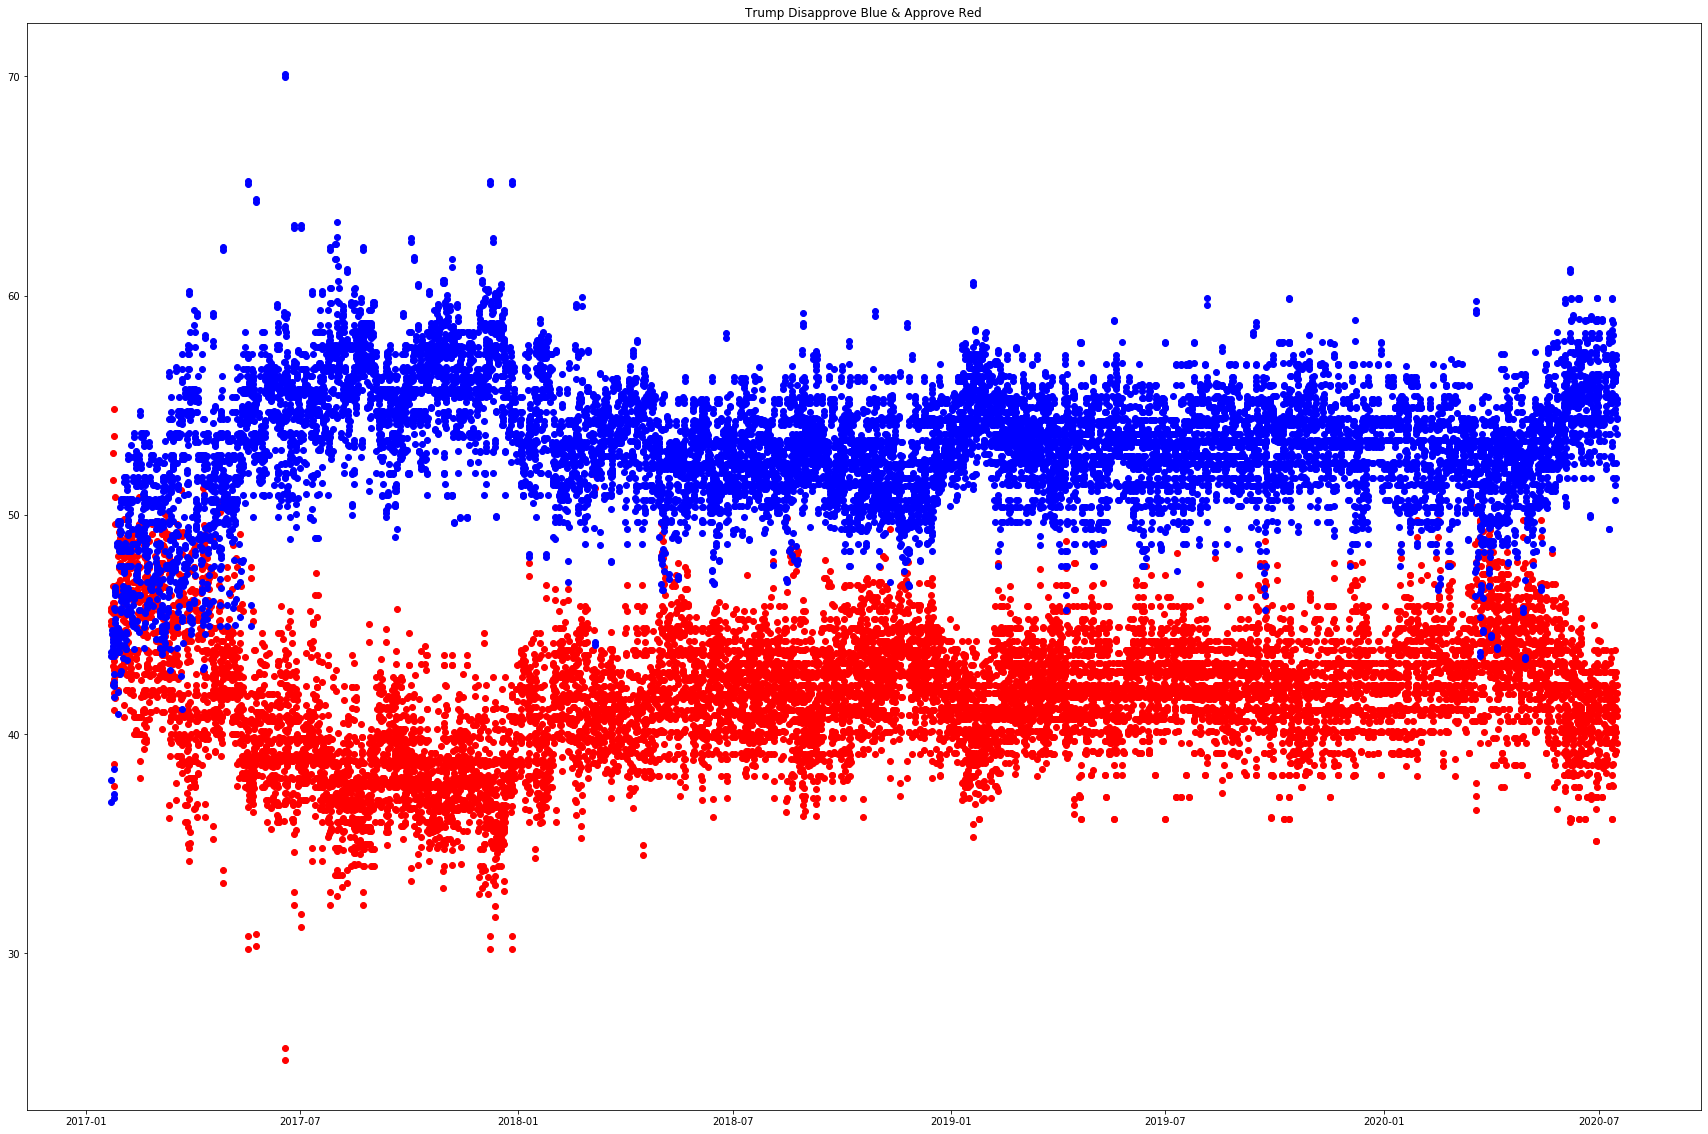

In [4]:
plt.figure(figsize=(30,20))
plt.scatter(x = trump_ratings['enddate'], y = trump_ratings['adjusted_approve'], c='red')
plt.scatter(x = trump_ratings['enddate'], y = trump_ratings['adjusted_disapprove'], c='blue')
plt.title('Trump Disapprove Blue & Approve Red')

plt.show()

<Figure size 2160x1440 with 0 Axes>

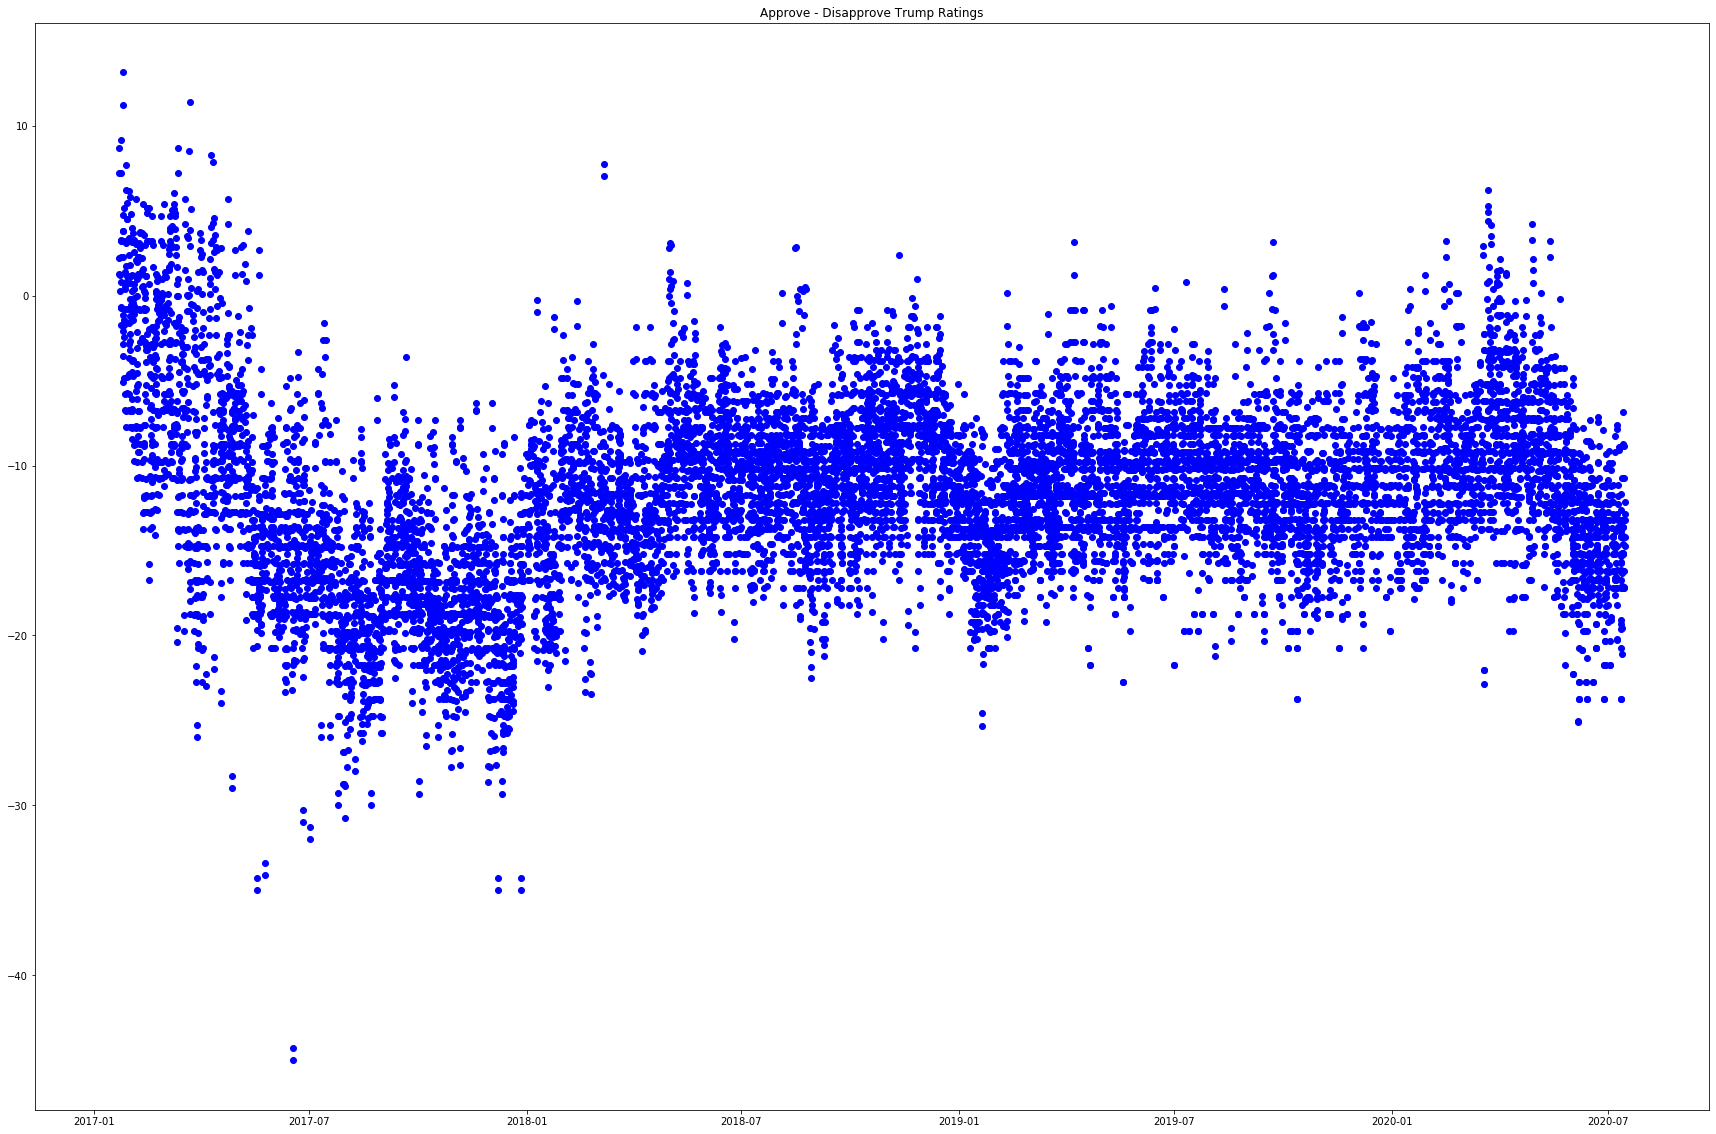

In [5]:
plt.figure(figsize=(30,20))
plt.figure(figsize=(30,20))
plt.scatter(x = trump_ratings['enddate'], y = (trump_ratings['adjusted_approve'] - trump_ratings['adjusted_disapprove']), c='blue')
plt.title('Approve - Disapprove Trump Ratings')

plt.show()

plt.show()

In [6]:
trump_sorted = trump_ratings.groupby('enddate').aggregate({'adjusted_approve': 'mean', 'adjusted_disapprove': 'mean'})
trump_sorted.index = pd.to_datetime(trump_sorted.index, unit='s')
trump_sorted

,adjusted_approve,adjusted_disapprove
enddate,,
2017-01-22,45.373756,40.529575
2017-01-23,45.377826,44.648448
2017-01-24,46.235906,43.702975
2017-01-25,44.284402,41.993271
2017-01-26,45.607006,46.012863
...,...,...
2020-07-12,39.979799,56.477837
2020-07-13,40.762214,55.909417
2020-07-14,40.948665,54.881739


In [7]:
trump_weekly_approve = trump_sorted['adjusted_approve'].resample('W', ).mean()
trump_weekly_disapprove = trump_sorted['adjusted_disapprove'].resample('W', ).mean()
trump_weekly_disapprove

enddate
2017-01-22    40.529575
2017-01-29    44.857060
2017-02-05    47.484225
2017-02-12    48.793869
2017-02-19    49.813858
                ...    
2020-06-21    55.873390
2020-06-28    55.381556
2020-07-05    55.718349
2020-07-12    55.005278
2020-07-19    55.080717
Freq: W-SUN, Name: adjusted_disapprove, Length: 183, dtype: float64

In [8]:
trump_weekly = pd.merge(trump_weekly_approve, trump_weekly_disapprove, left_on='enddate', right_on='enddate').reset_index()
trump_weekly

,enddate,adjusted_approve,adjusted_disapprove
0,2017-01-22,45.373756,40.529575
1,2017-01-29,45.489185,44.857060
2,2017-02-05,45.597309,47.484225
3,2017-02-12,45.461622,48.793869
4,2017-02-19,44.543586,49.813858
...,...,...,...
178,2020-06-21,40.535744,55.873390
179,2020-06-28,40.915964,55.381556
180,2020-07-05,40.369681,55.718349
181,2020-07-12,41.142716,55.005278


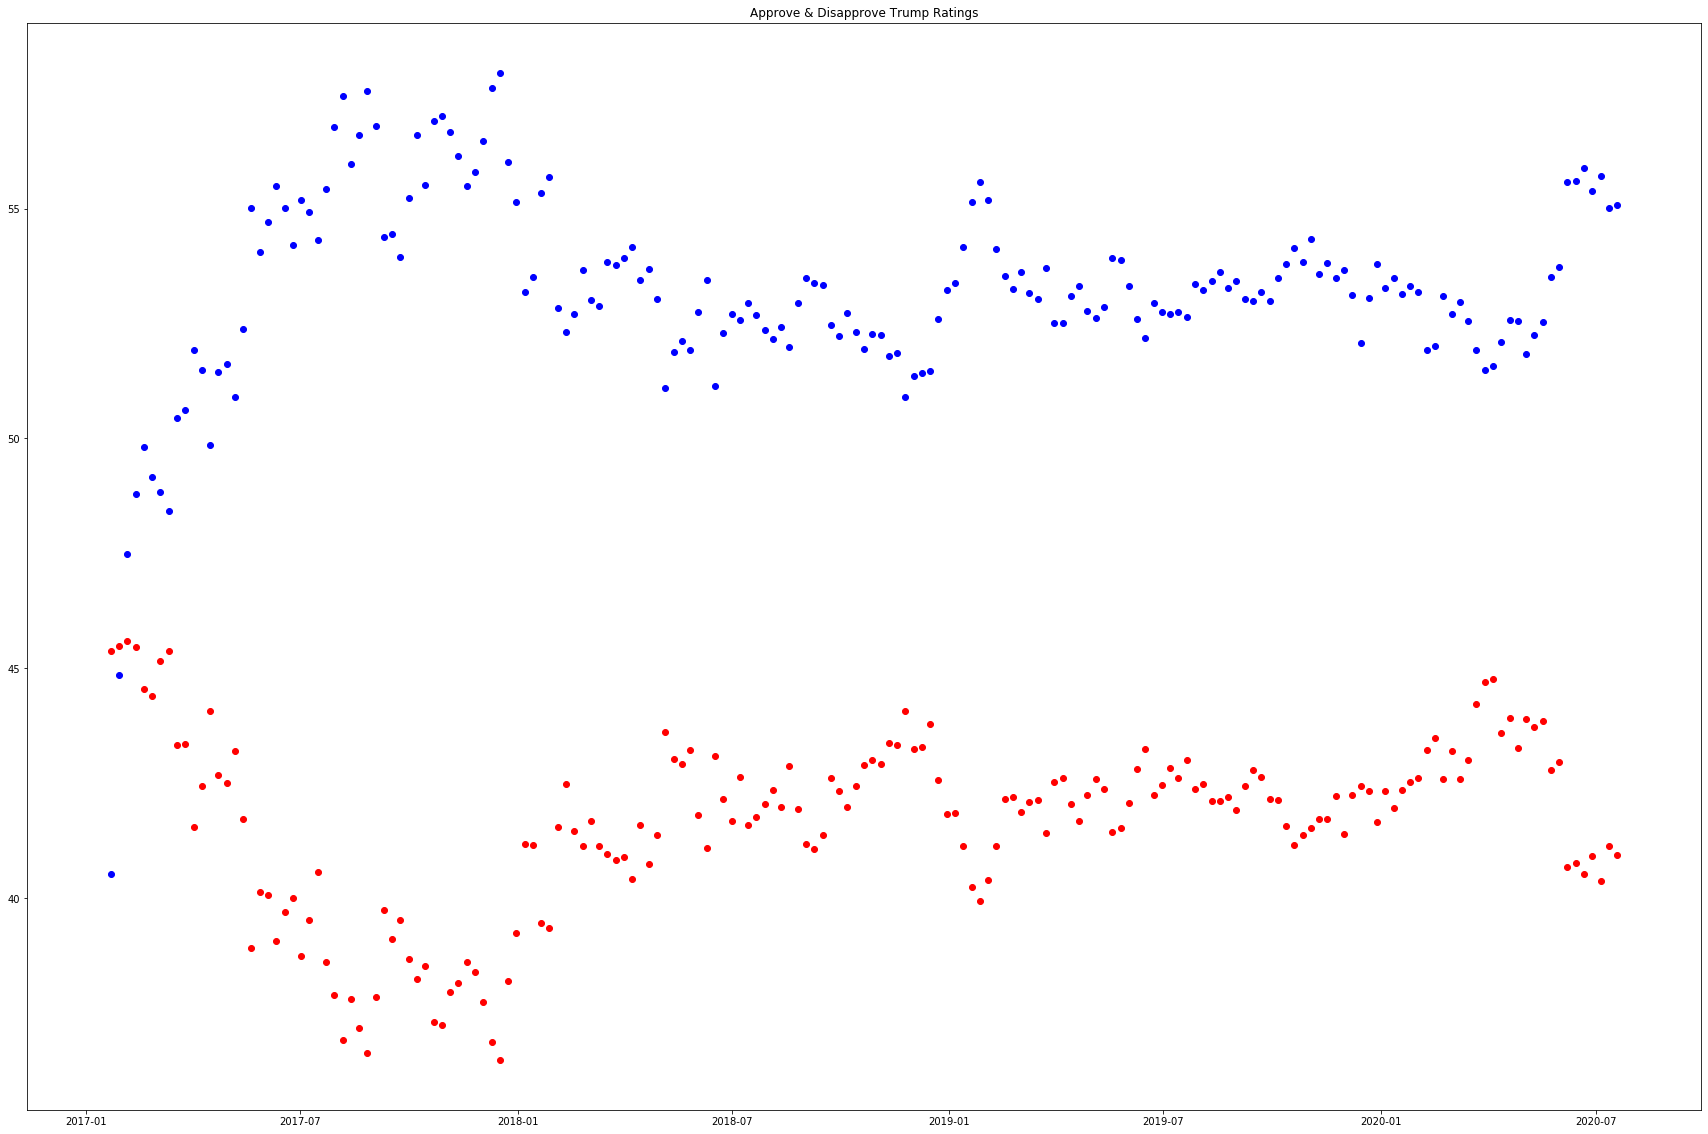

In [9]:
plt.figure(figsize=(30,20))
plt.scatter(x = trump_weekly['enddate'], y = trump_weekly['adjusted_approve'], c='red')
plt.scatter(x = trump_weekly['enddate'], y = trump_weekly['adjusted_disapprove'], c='blue')
plt.title('Approve & Disapprove Trump Ratings')
plt.show()


In [10]:
trump_weekly.describe(include='all')

,enddate,adjusted_approve,adjusted_disapprove
count,183,183.000000,183.000000
unique,183,NaN,NaN
top,2020-07-05 00:00:00,NaN,NaN
freq,1,NaN,NaN
first,2017-01-22 00:00:00,NaN,NaN
last,2020-07-19 00:00:00,NaN,NaN
mean,NaN,41.644459,53.239939
std,NaN,1.895540,2.086993
min,NaN,36.474552,40.529575
25%,NaN,40.901674,52.340097


In [11]:
us_counties = "covid_data/us-counties.csv"
us_states = "covid_data/us-states.csv"
us_total = "covid_data/us.csv"
counties = pd.read_csv(us_counties)
states = pd.read_csv(us_states)
us = pd.read_csv(us_total)

In [13]:
us

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
173,2020-07-12,3318347,134977
174,2020-07-13,3379859,135402
175,2020-07-14,3445483,136356
176,2020-07-15,3513846,137327


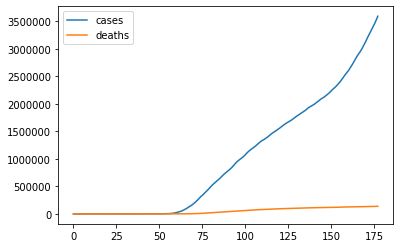

In [14]:
us.plot()

In [23]:
# Convert to date time

us.index = pd.to_datetime(us['date']).reset_index(drop=True)
us.drop(columns={'date'})



,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0
...,...,...
2020-07-12,3318347,134977
2020-07-13,3379859,135402
2020-07-14,3445483,136356


In [39]:
#Resample by week
us_weekly = us[['cases', 'deaths']].resample('W', ).mean()
us_weekly

trump_covid_weeks = trump_weekly[-26:]
trump_covid_weeks

,enddate,adjusted_approve,adjusted_disapprove
157,2020-01-26,42.519848,53.322568
158,2020-02-02,42.608594,53.187860
159,2020-02-09,43.220550,51.920645
160,2020-02-16,43.494213,52.001329
161,2020-02-23,42.599587,53.105975
162,2020-03-01,43.195571,52.716095
163,2020-03-08,42.583414,52.977333
164,2020-03-15,43.007764,52.556184
165,2020-03-22,44.215007,51.919535
166,2020-03-29,44.707252,51.500045


The r-squared is: 0.5010092380776222


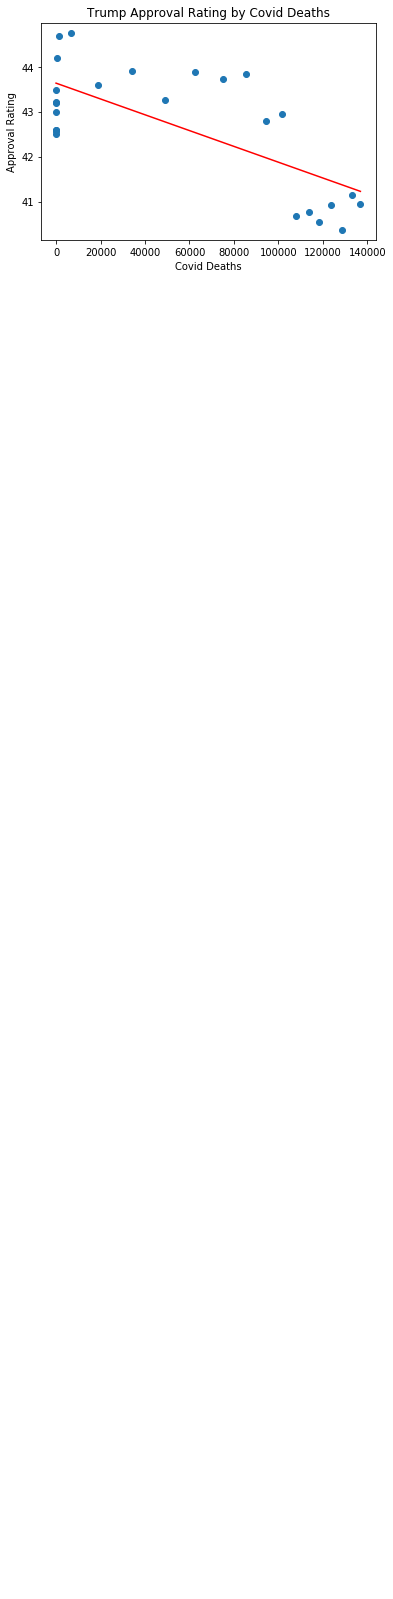

In [46]:
x_values = us_weekly['deaths']
y_values = trump_covid_weeks['adjusted_approve']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Covid Deaths')
plt.ylabel('Approval Rating')
print(f"The r-squared is: {rvalue**2}")
plt.title('Trump Approval Rating by Covid Deaths')
plt.show()

The r-squared is: 0.5270430515297485


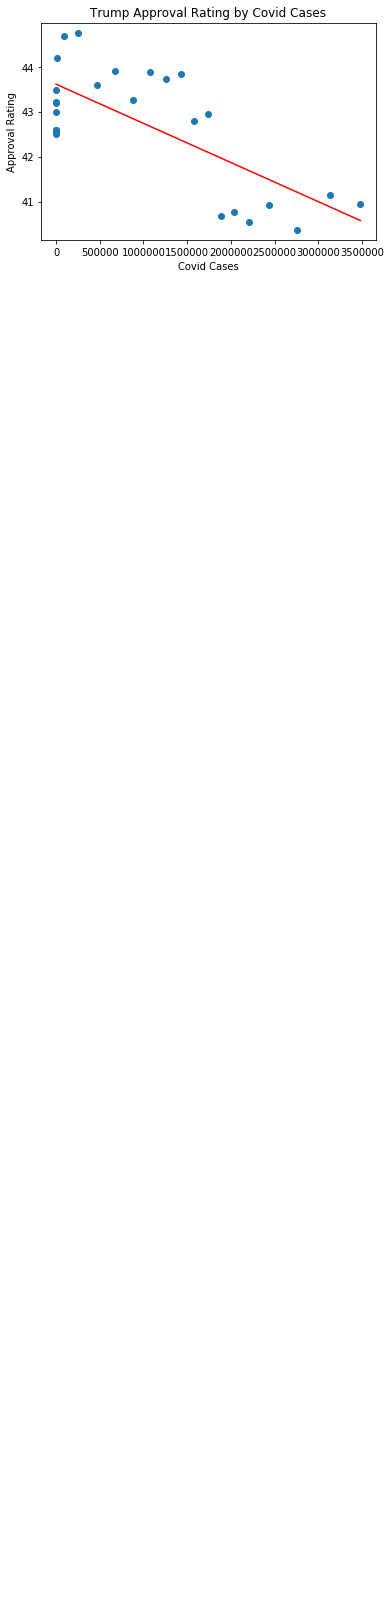

In [47]:
x_values = us_weekly['cases']
y_values = trump_covid_weeks['adjusted_approve']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Covid Cases')
plt.ylabel('Approval Rating')
plt.title('Trump Approval Rating by Covid Cases')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [62]:
# Download the congressional ballot and convert index to datetime so it can be resampled by week.

congressional_ballot = "approval_ratings/generic_polllist.csv"
general_ballot = pd.read_csv(congressional_ballot)
general_ballot.drop(columns={'subgroup', 'modeldate', 'startdate'}, inplace=True)
general_ballot.index = pd.to_datetime(general_ballot['enddate']).reset_index(drop=True)
general_ballot.drop(columns={'enddate'})
general_ballot

,enddate,pollster,grade,samplesize,population,weight,influence,dem,rep,adjusted_dem,adjusted_rep,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
enddate,,,,,,,,,,,,,,,,,,
2018-12-02,12/2/2018,Winston Group,B/C,1000,rv,0.753612,0.000000,47.0,41.0,46.821674,41.274141,NaN,NaN,https://www.winningtheissues.org/wp-content/up...,66565,124055,5/29/2020,18:00:11 17 Jul 2020
2018-12-30,12/30/2018,Winston Group,B/C,1000,rv,0.611841,0.000000,48.0,41.0,47.821674,41.274141,NaN,NaN,https://www.winningtheissues.org/wp-content/up...,66581,124115,5/29/2020,18:00:11 17 Jul 2020
2019-01-02,1/2/2019,HarrisX,C,3012,rv,0.032487,0.000000,45.0,35.0,49.910864,39.819588,NaN,T,https://scottrasmussen.com/generic-ballot-daily/,57208,92471,1/3/2019,18:00:11 17 Jul 2020
2019-01-03,1/3/2019,HarrisX,C,3012,rv,0.031667,0.000000,44.0,35.0,48.910864,39.819588,NaN,T,https://scottrasmussen.com/generic-ballot-daily/,57218,92479,1/4/2019,18:00:11 17 Jul 2020
2019-01-04,1/4/2019,HarrisX,C,3003,rv,0.030810,0.000000,43.0,36.0,47.910864,40.819588,NaN,T,https://scottrasmussen.com/generic-ballot-daily/,57221,92483,1/5/2019,18:00:11 17 Jul 2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30,6/30/2020,YouGov,B,1198,rv,0.277746,0.235632,49.0,40.0,49.322521,40.841741,NaN,NaN,https://docs.cdn.yougov.com/k05rp8ded6/econTab...,66967,125049,7/1/2020,18:00:11 17 Jul 2020
2020-07-07,7/7/2020,YouGov,B,1165,rv,0.294419,0.271991,51.0,40.0,51.322521,40.841741,NaN,NaN,https://docs.cdn.yougov.com/lraqqdhd7j/econTab...,67017,125217,7/8/2020,18:00:11 17 Jul 2020
2020-07-12,7/12/2020,NBC News/The Wall Street Journal,A-,900,rv,1.359525,1.332942,47.0,43.0,46.611492,42.338398,NaN,NaN,https://assets.documentcloud.org/documents/698...,67110,125410,7/15/2020,18:00:11 17 Jul 2020


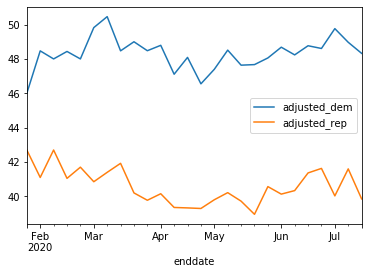

In [68]:
# Resample adjusted Democratic and Republican approval numbers by week.

general_ballot_weekly = general_ballot[['adjusted_dem', 'adjusted_rep']].resample('W', ).mean()
general_ballot_covid_weeks = general_ballot_weekly[-26:]
general_ballot_covid_weeks.plot()

The r-squared is: 0.04940765225134404


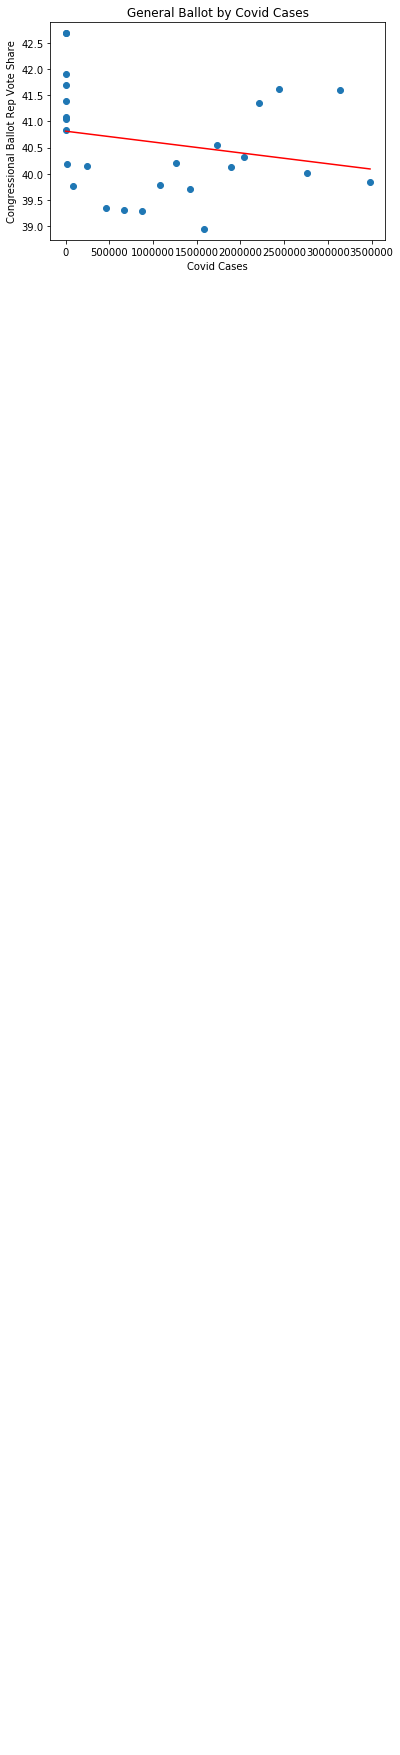

In [69]:
x_values = us_weekly['cases']
y_values = general_ballot_covid_weeks['adjusted_rep']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Covid Cases')
plt.ylabel('Congressional Ballot Rep Vote Share')
plt.title('General Ballot by Covid Cases')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.06668568957703314


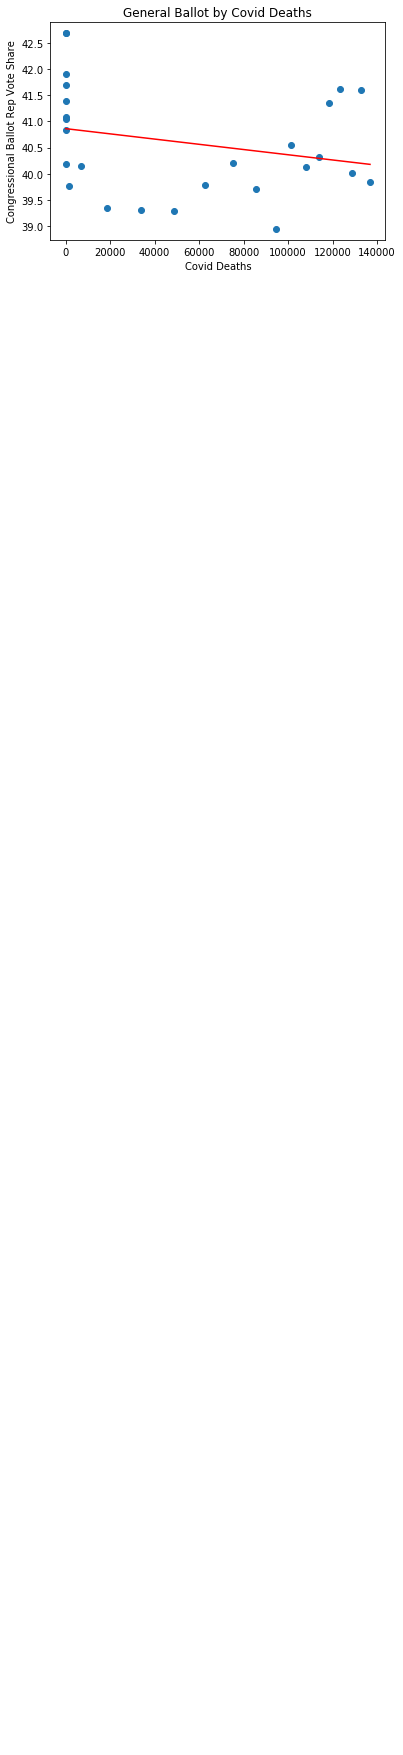

In [70]:
x_values = us_weekly['deaths']
y_values = general_ballot_covid_weeks['adjusted_rep']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Covid Deaths')
plt.ylabel('Congressional Ballot Rep Vote Share')
plt.title('General Ballot by Covid Deaths')
print(f"The r-squared is: {rvalue**2}")
plt.show()